# Análisis Exploratorio de Datos (EDA) – 30 Empresas Tecnológicas

Este notebook realiza un análisis inicial de los datos descargados de yfinance:
- Panel mensual de precios y retornos
- Estadísticas descriptivas
- Gráficos de tendencia y volatilidad

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use("default")
sns.set_context("notebook")


In [2]:
# Rutas (asumiendo notebook en /notebooks)
PROJECT_ROOT = os.path.dirname(os.getcwd())
PROCESSED_DIR = os.path.join(PROJECT_ROOT, "data", "processed")

PANEL_FILE = os.path.join(PROCESSED_DIR, "tech30_panel_monthly_2018_2024.csv")
AGG_FILE   = os.path.join(PROCESSED_DIR, "tech30_aggregated_stats_2018_2024.csv")

panel_df = pd.read_csv(PANEL_FILE, parse_dates=["Date"])
agg_df   = pd.read_csv(AGG_FILE)

panel_df.head()


,Company,Ticker,Date,AdjClose,Volume,Return
0,Microsoft,MSFT,2018-02-28,86.647766,725663300.0,-0.008451
1,Microsoft,MSFT,2018-03-31,84.337616,750754800.0,-0.027023
2,Microsoft,MSFT,2018-04-30,86.416756,668130700.0,0.024354
3,Microsoft,MSFT,2018-05-31,91.728539,509417900.0,0.059652
4,Microsoft,MSFT,2018-06-30,91.515099,602585200.0,-0.002330


In [3]:
print("Observaciones:", panel_df.shape[0])
print("Empresas:", panel_df["Company"].nunique())
print("Periodo:", panel_df["Date"].min().date(), "-", panel_df["Date"].max().date())


Observaciones: 2403
Empresas: 30
Periodo: 2018-02-28 - 2024-12-31


In [4]:
panel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Company   2403 non-null   object        
 1   Ticker    2403 non-null   object        
 2   Date      2403 non-null   datetime64[ns]
 3   AdjClose  2403 non-null   float64       
 4   Volume    2403 non-null   float64       
 5   Return    2403 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 112.8+ KB


In [5]:
panel_df[["AdjClose", "Volume", "Return"]].describe()


,AdjClose,Volume,Return
count,2403.000000,2.403000e+03,2403.000000
mean,2084.289002,8.409799e+08,0.015266
std,10555.088858,1.905822e+09,0.108431
min,3.309732,8.622200e+06,-0.676915
25%,44.554747,8.869875e+07,-0.045282
50%,113.000000,2.449590e+08,0.017335
75%,222.747810,6.783272e+08,0.075117
max,81511.546875,1.687099e+10,0.984401


In [6]:
panel_df.groupby("Company")["Return"].agg(
    MeanReturn="mean",
    StdReturn="std",
    MinReturn="min",
    MaxReturn="max",
    N="count"
).sort_values("MeanReturn", ascending=False)


,MeanReturn,StdReturn,MinReturn,MaxReturn,N
Company,,,,,
Palantir,0.041075,0.248074,-0.386599,0.984401,51
Nvidia,0.037576,0.140490,-0.386065,0.310008,83
Tesla,0.034602,0.189046,-0.457813,0.554719,83
Broadcom,0.029832,0.092371,-0.235309,0.376636,83
Fortinet,0.028135,0.109302,-0.255274,0.286250,83
Cloudflare,0.028096,0.183820,-0.430622,0.547277,63
ServiceNow,0.023737,0.078987,-0.152548,0.211654,83
Apple,0.022371,0.084030,-0.199913,0.196035,83
Taiwan Semiconductor,0.020067,0.093745,-0.189700,0.329046,83


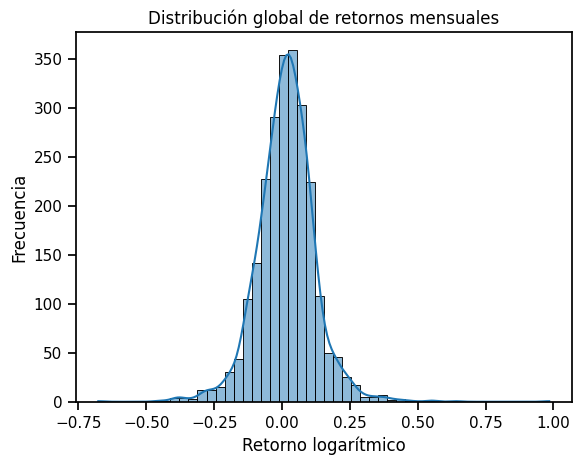

In [7]:
plt.figure()
sns.histplot(panel_df["Return"], bins=50, kde=True)
plt.title("Distribución global de retornos mensuales")
plt.xlabel("Retorno logarítmico")
plt.ylabel("Frecuencia")
plt.show()


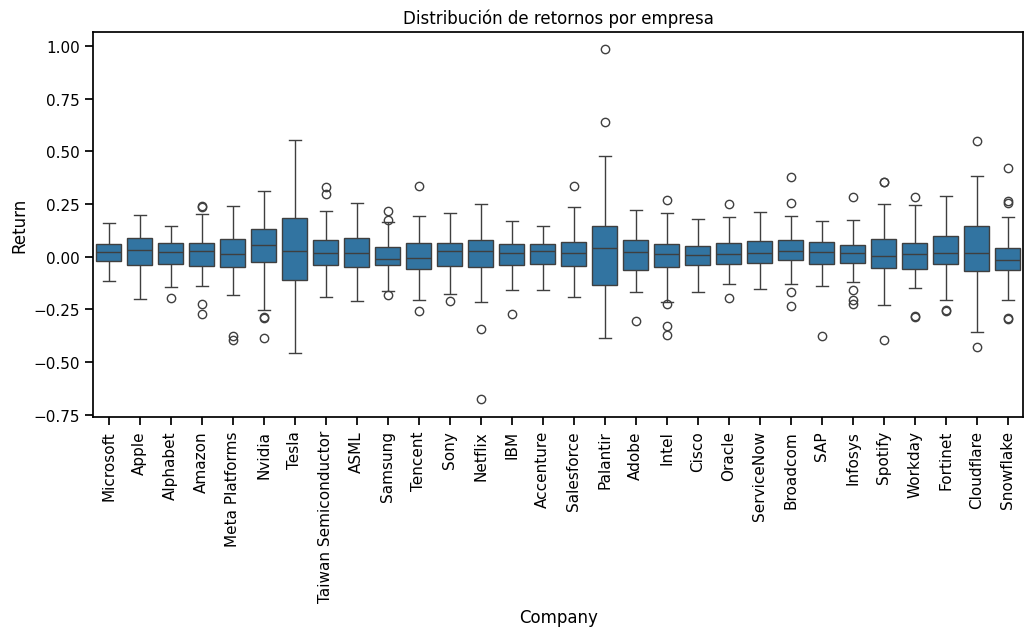

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Company", y="Return", data=panel_df)
plt.xticks(rotation=90)
plt.title("Distribución de retornos por empresa")
plt.show()


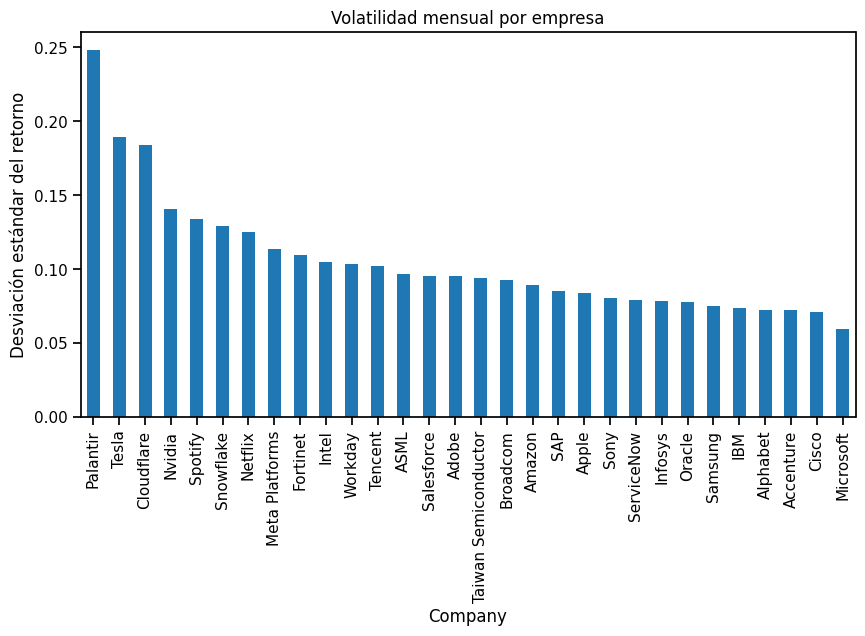

In [9]:
vol_df = panel_df.groupby("Company")["Return"].std().sort_values(ascending=False)

plt.figure(figsize=(10,5))
vol_df.plot(kind="bar")
plt.title("Volatilidad mensual por empresa")
plt.ylabel("Desviación estándar del retorno")
plt.show()


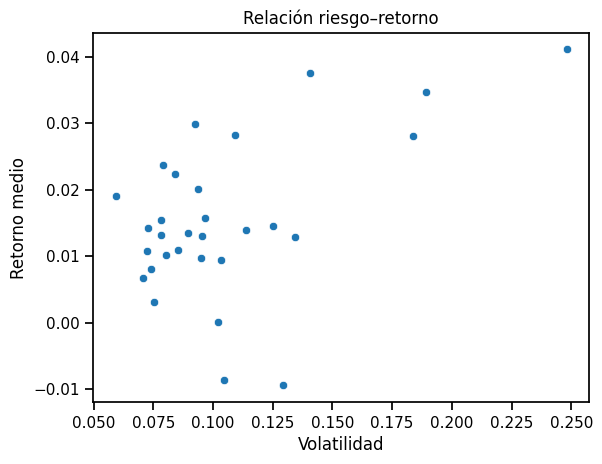

In [10]:
plt.figure()
sns.scatterplot(
    x=agg_df["Volatility"],
    y=agg_df["MeanReturn"]
)
plt.xlabel("Volatilidad")
plt.ylabel("Retorno medio")
plt.title("Relación riesgo–retorno")
plt.show()


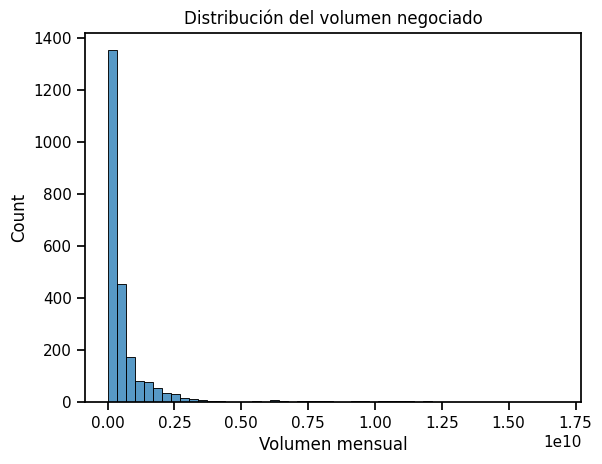

In [11]:
plt.figure()
sns.histplot(panel_df["Volume"], bins=50)
plt.title("Distribución del volumen negociado")
plt.xlabel("Volumen mensual")
plt.show()


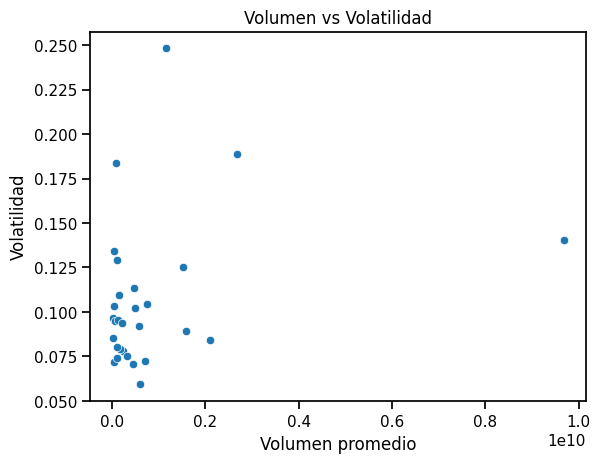

In [12]:
plt.figure()
sns.scatterplot(
    x=agg_df["AvgVolume"],
    y=agg_df["Volatility"]
)
plt.xlabel("Volumen promedio")
plt.ylabel("Volatilidad")
plt.title("Volumen vs Volatilidad")
plt.show()


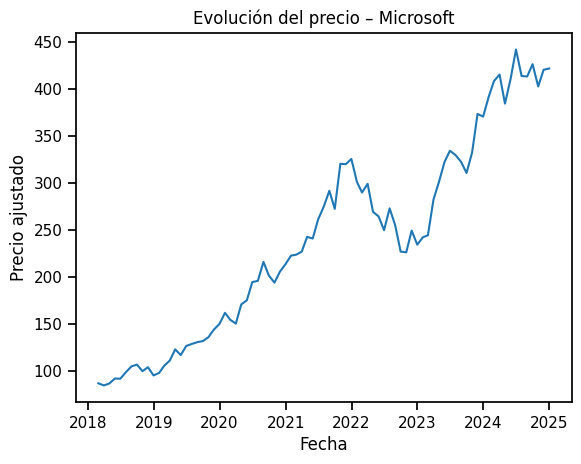

In [13]:
example_company = "Microsoft"

df_m = panel_df[panel_df["Company"] == example_company]

plt.figure()
plt.plot(df_m["Date"], df_m["AdjClose"])
plt.title(f"Evolución del precio – {example_company}")
plt.xlabel("Fecha")
plt.ylabel("Precio ajustado")
plt.show()


In [14]:
panel_df[["AdjClose", "Volume", "Return"]].corr()


,AdjClose,Volume,Return
AdjClose,1.000000,-0.051441,-0.016502
Volume,-0.051441,1.000000,0.040826
Return,-0.016502,0.040826,1.000000


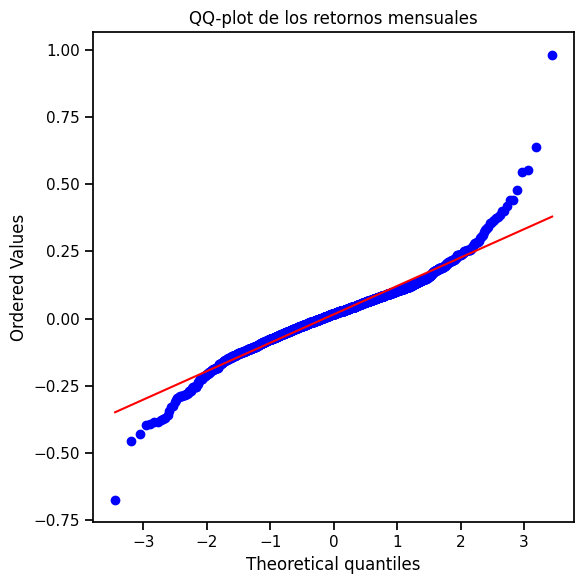

In [15]:
returns = panel_df["Return"].dropna()

plt.figure(figsize=(6, 6))
stats.probplot(returns, dist="norm", plot=plt)
plt.title("QQ-plot de los retornos mensuales")
plt.tight_layout()
plt.show()
